In [ ]:
from scipy.stats import f
#Date
n1=10
n2=13
x1=15
x2=14
ssd1=90
ssd2=100
alpha=0.05
#CALCULATE  THE VARIANCE
variance_1=ssd1/n1-1
variance_2=ssd2/n2-1
f_statistic=variance_1/variance_2
print(f'fstatistic:{f_statistic}')

#df
df1=n1-1
df2=n2-1
#p_value
p_value=f.cdf(f_statistic,df1,df2)
print(f'P_value:{p_value}')
#f_Critical
f_Critical=f.ppf(1-alpha/2,df1,df2)
print(f_Critical)

if p_value<alpha:
  print('Reject the null hypothesis')
else:
  print('Accept or failed to Reject')

#fcritical
#critical_value=f.ppf(1-alpha/2),df1,df2
#print(critical_value)
#we can't apply any test on any data if we apply wrong test then chances of getting type 1 and type2 error is higher.if suppose population_deviation is not given then we apply t-test.



fstatistic:1.1954022988505746
P_value:0.6219089869805239
3.435845641861058
Accept or failed to Reject


In [ ]:
#suppose we  get the data from amazon snowflake using sql we have fetch the data then data would be having redundant  NAN values. We have to check/test the normality of datasets.IF it is not normalised then we have to
#apply transformations that  normalise the data ,then after selection we apply t test,ztest,f test.

In [ ]:
#Aishwariya   M   T    Wed   Thu   Fri    Sat
             230  250  300    315   320    313

#Rudra        200  220 320    321   300    299
 #Goodness of fit Claims is how true are the claims  of aishwariya.We haveto validatethose claims
#              mon TUES wed thus Fri
#observed      23  16    14  19  28
 #expected:    20  20    20  20  20

 #Step1:     H0  obs=Exp
#            H1  obs not equal to Exp
  #Step2:
 # df=n-1
# df 5-1
#df 4



IndentationError: unexpected indent (<ipython-input-5-ed12c50b0a4f>, line 2)

In [ ]:
#Step3

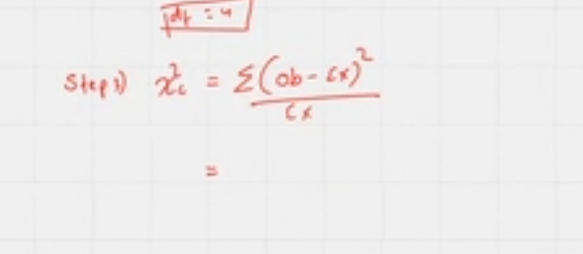

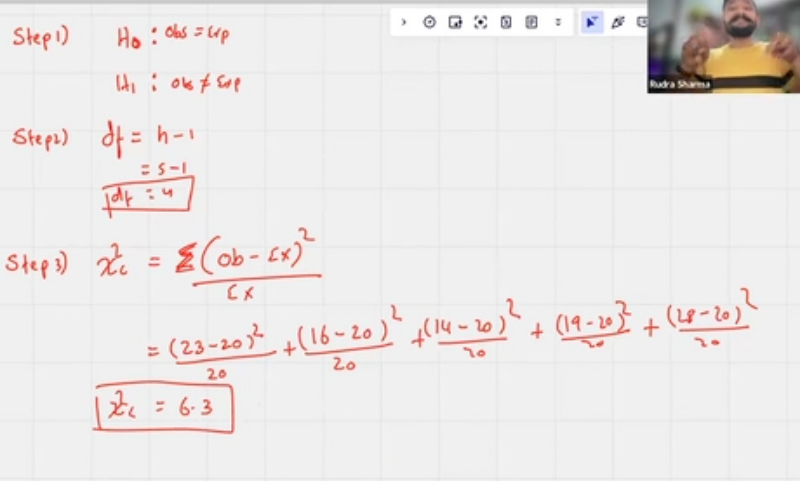

Chi Square Table
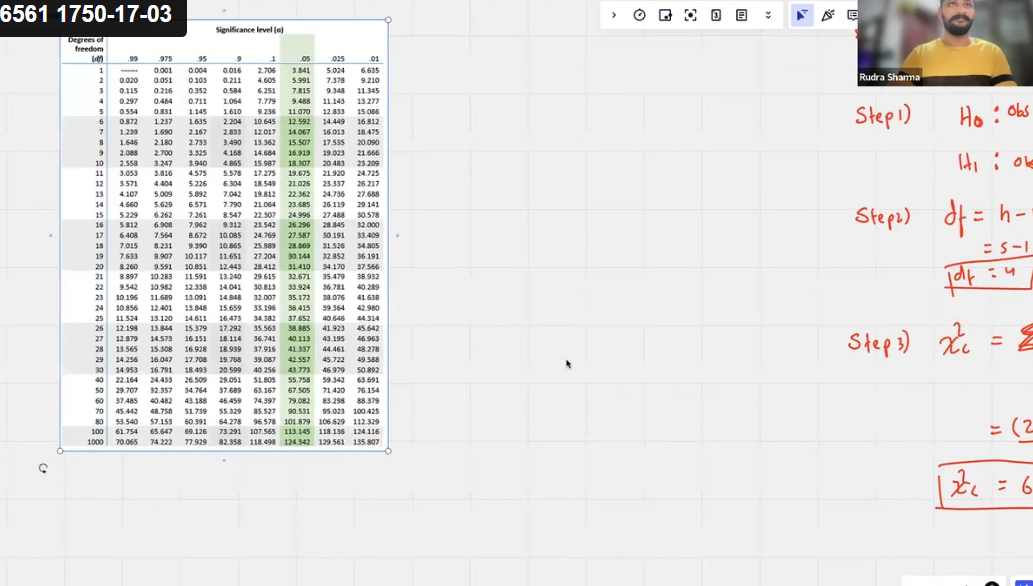

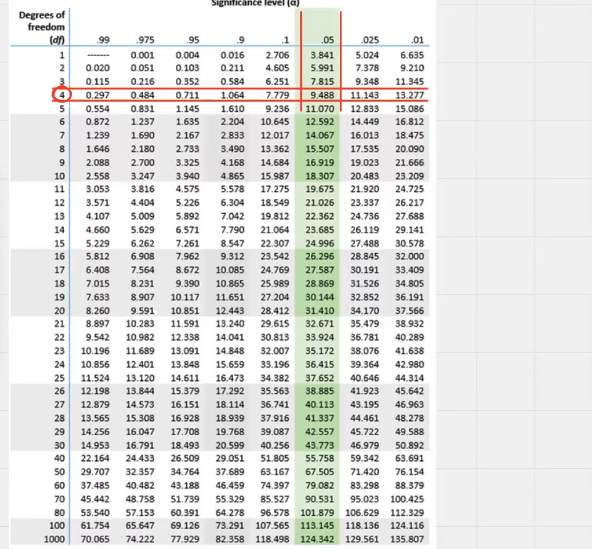

In [ ]:
# Null hypothesis is accepted

In [ ]:
observed=[23,16,14,19,28]
expected=[20,20,20,20,20]

chi2_statistic=0
for observed_val,expected_val in zip(observed,expected):
  chi2_statistic+=(observed_val-expected_val)**2/(expected_val)
print(f'chi2_ststistic:{chi2_statistic}')


chi2_ststistic:6.3


In [ ]:
settle=zip(observed,expected)
print(set(settle))                         #It returns a single entitiy having mapped elements,elementwisemapping

{(16, 20), (28, 20), (23, 20), (19, 20), (14, 20)}


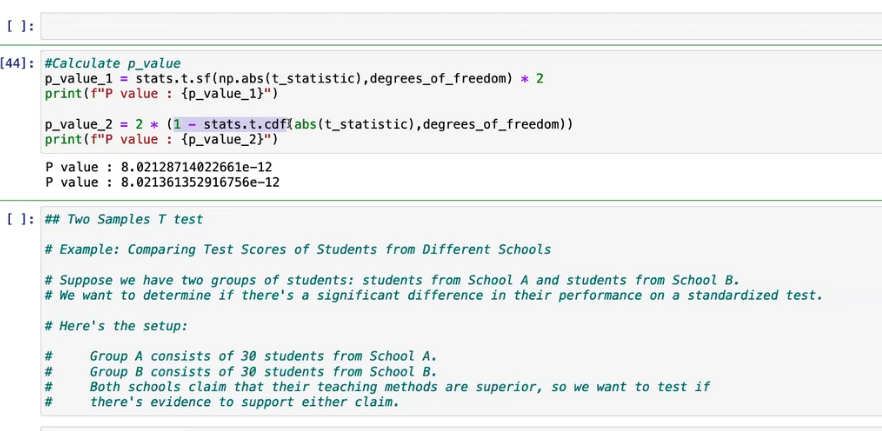

In [ ]:
from scipy.stats import chi2
df=4
alpha=0.05
chisquare_critical=chi2.ppf(1-alpha,df)
print(chisquare_critical)

p_value=1-chi2.cdf(chi2_statistic,df)
print(f'p_value{p_value}')
if p_value<alpha:
  print('Reject')
else:
  print('Accept')

9.487729036781154
p_value0.1778363264982168
Accept


**Chi** Square test for categorical data can be used to check the goodness of fit or test of independance.

In [ ]:
#Political Parties have their exit polls They take exit poll from one and take another exit poll and  validate thier claims if the results are same then
#TV9 HAS A EXIT POLL ,NDTV HAS A EXIT POLL

#To validate the claims between observed and expected Sample-Size should be greater than 5 we use goodness of fit chi square test.
#Anova is used to compare more than 2 groups.For more than two groups Anova compares variances or means between groups.

In [ ]:
#dependent variable/Independent  variable One way anova :Two way anova

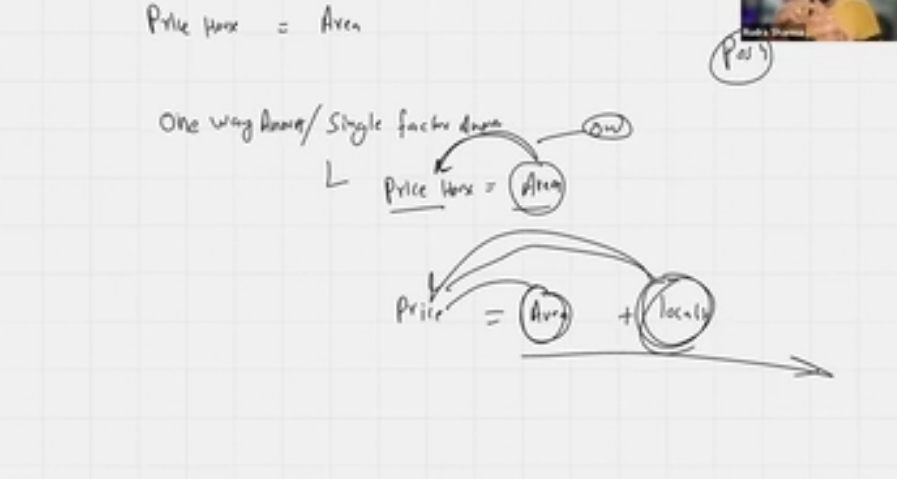



In [ ]:
#one way anova
#Suppose you are studying the effectiveness of three different fertilisers(fertiliser A,B and C) on the growth of plants .You have randomly selected 20 plants and divided them
#into three groups ,each treated with one of the fertilisers.After a month ,you measure the height of each plant.
#You can perform  a one way anova  to determine if there are statistically significant differences in the mean heights  of plants
#threated with different fertilisers(null hypothesis :the means are equal)

In [ ]:
from scipy.stats import f_oneway
alpha=0.05
fertiliser_A=[12,13,15,14,16,17,15,17,15,19]
len(fertiliser_A)
fertiliser_B=[10,13,16,17,16,14,15,20,15,19]
fertiliser_C=[12,13,12,16,15,15,15,14,15,19]
f_statistic,p_value=f_oneway(fertiliser_A,fertiliser_B,fertiliser_C)
print('One way Anova Result')
print(f'FStatistic:{f_statistic}')
print(f'Pvalue:{p_value}')
if p_value<alpha:
  print('Reject Null Hypothesis,there are significant difference in mean_heights')
else:
  print('Failed to Reject! Null hypothesis No significant difference')





One way Anova Result
FStatistic:0.39933774834437086
Pvalue:0.674660701475253
Accept! Null hypothesis No significant difference


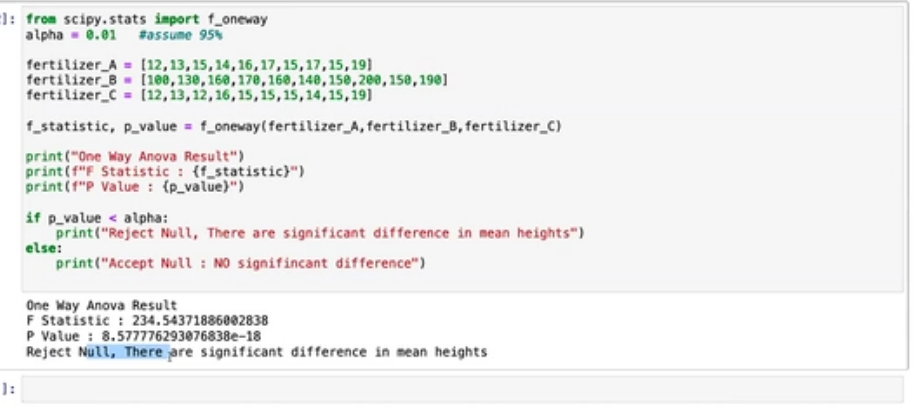

In [ ]:
#Two Way
#Suppose you're studying the effects of both gender and education level  on income.
#You collect data from a sample of individuals,recording their gender(male/female) and education level(highschool,bachelors degree,masters degree).Then you measure their
#annual income.
#here's a simplified dataset
#Gender:Education level:Income
#Male:High School-30000
#Female-Bachelors-50000
#Male-Bachelors-45000
#Female-Masters--60000
# You can Perform a two way anova to determine if there are statistically significant main effects of gender and education level on income as well as whether there's an interaction effect(i.e.,whether
#the effect of gender on income depends on education level,and vice versa)


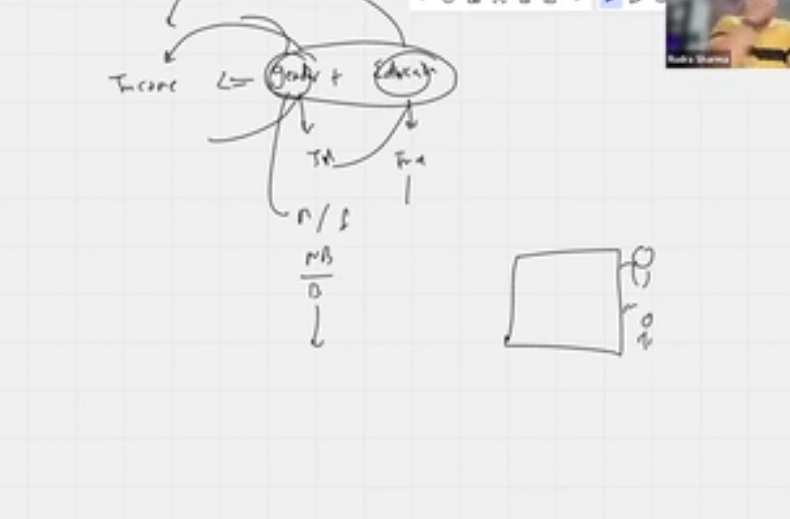

In [ ]:
import pandas as pd

data= {
    "Gender":['Male','Female','Male','Female','Male','Female'],
    "Education_Level":["High School","Bachelor's Degree","Master's Degree","Bachelor's Degree","Master's Degree","High School"],
    "Income":[30000,40000,45000,34000,56000,32000]

}
df=pd.DataFrame(data)

In [ ]:
df

,Gender,Education Level,Income
0,Male,High School,30000
1,Female,Bachelor's Degree,40000
2,Male,Master's Degree,45000
3,Female,Bachelor's Degree,34000
4,Male,Master's Degree,56000
5,Female,High School,32000


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#anova in some way is a linear regression problem  ols stands for ordinary least square,gradient descent
model=ols('Income~Gender + Education_Level + Gender:Education_Level',data=df).fit()
#Firstly I need to know what gender does to income Then I need to know what education does to income Then we need to combine gender and Education level and
#know their effect on income,Income is dependent variable and Gender , Education are independent variable.
anova_result=anova_lm(model)
print(anova_result)

                         df        sum_sq       mean_sq         F    PR(>F)
Gender                  1.0  1.041667e+08  1.041667e+08  2.653928  0.244847
Education_Level         2.0  2.968333e+08  1.484167e+08  3.781316  0.209147
Gender:Education_Level  2.0  7.850000e+07  3.925000e+07  1.000000  0.500000
Residual                2.0  7.850000e+07  3.925000e+07       NaN       NaN


In [ ]:
if p_value < alpha :
  print('Reject Null Hypothesis,there are significant difference ')
else:
  print('Failed to Reject! Null hypothesis No significant difference')

#we can compare PR and alpha and check as P value
#Gender,Education,Gender and education taken togther has no significant difference on income


NameError: name 'p_value' is not defined